In [78]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt

In [16]:
# Read in data
df = pd.read_excel("Cleaned June 2020 Prison Stock Pop.xls")

In [32]:
# Clean data
df["Custody Date"] = pd.to_datetime(df["Custody Date"], format="%Y-%m-%d") #Custody Date is the start of an inmate's sentence
df["Date of Birth"] = pd.to_datetime(df["Date of Birth"], format="%Y-%m-%d")

In [20]:
df

,IDOC #,Name,Date of Birth,Sex,Race,Veteran Status,Current Admission Date,Admission Type,Parent Institution,Projected Mandatory Supervised Release (MSR) Date,Projected Discharge Date,Custody Date,Sentence Date,Crime Class,Holding Offense,Sentence Years,Sentence Months,Truth in Sentencing,Sentencing County
0,A00147,"MCCUTCHEON, JOHN",1949-06-14,Male,White,Yes,1983-02-16,Discharged & recommitted,Dixon,2033-10-06 00:00:00,2036-10-06 00:00:00,1982-11-26,1983-02-15,Class X,ATTEMPT MURDER/INTENT TO KILL/INJURE,0050,00,Day-for-Day,Jasper
1,A01054,"TIPTON, DARNELL",1954-03-25,Male,Black,No,1988-12-23,"Parole violator, New sentence",Western Illinois,2065-08-14 00:00:00,2068-08-14 00:00:00,1986-09-29,1987-08-07,Class X,AGG CRIM SEX ASSAULT/WEAPON,0060,00,Day-for-Day,Cook
2,A01072,"BRISBON, HENRY",1956-01-12,Male,Black,No,1974-02-22,Direct from court,Pontiac,NaN,NaN,1982-02-24,1982-02-24,Murder,MURDER/INTENT TO KILL/INJURE,LIFE,,Day-for-Day,Will
3,A01077,"JONES, ROBERT",1953-04-03,Male,Black,No,1983-09-16,"MSR violator, New sentence",Pinckneyville,NaN,NaN,1982-04-13,1983-09-15,Murder,MURDER/INTENT TO KILL/INJURE,LIFE,,Day-for-Day,Cook
4,A01148,"BROWN, RONALD",1955-02-02,Male,Black,No,2005-12-13,Discharged & recommitted,Western Illinois,NaN,NaN,1998-10-03,2005-12-09,Murder,MURDER/INTENT TO KILL/INJURE,LIFE,,Day-for-Day,Cook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,Y42081,"LEISGANG, ANDREA S.",1982-03-01,Female,White,Unknown,2020-03-26,Direct from court,Logan,2082-08-20 00:00:00,NaN,2018-11-20,2020-03-20,Class X,PRED CRIM SEX ASSLAUT/VICTIM <13,0060,00,85%,Madison
32044,Y42082,"KECK, BRANDY J.",1978-07-23,Female,White,Unknown,2020-03-26,Direct from court,Logan,2020-07-24 00:00:00,2021-07-24 00:00:00,2020-01-24,2020-03-23,Class 4,POSS AMT CON SUB EXCEPT(A)/(D),0001,00,Day-for-Day,Madison
32045,Y42083,"NELLIGAN, JOHN J.",1988-08-31,Male,White,Unknown,2020-03-26,Direct from court,Graham,2021-02-20 00:00:00,2022-02-20 00:00:00,2020-02-20,2020-03-19,Class 4,POSS AMT CON SUB EXCEPT(A)/(D),0003,00,Day-for-Day,Jefferson
32046,Y42173,"GONZALEZ, RENE",1973-06-13,Male,Hispanic,Unknown,2020-06-18,Technical MSR violator,Stateville,2020-05-11 00:00:00,2022-05-11 00:00:00,2018-09-10,2020-04-22,Class 2,AGG CRIM SEX ABUSE/VICTIM <13,0003,00,Day-for-Day,Cook


In [187]:
# Costs
costOfAnInmate = 34135
costOfAnInmateOverSixty = 68270

# Statistics for Inmates Granted EDR in 2022

In [194]:
#Calculate the number of inmates who will have served 20 years of their sentence by 2022
twentyYearsServedDate = pd.to_datetime(str(2022 - 20) + "-12-31")
numReleased = len(df.loc[df["Custody Date"] <= twentyYearsServedDate])

#Savings from the reduction in inmate population
savings = numReleased * costOfAnInmate
print(numReleased)
print(savings)


#Calculate the cost of all hearings that will occur in 2022
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================



#STILL NEED TO CREATE PLOT FOR THIS DATA FROM JANUARY 2022 TO DECEMBER 2022

4408
150467080


The statistics below have been calculated assuming all inmates who have served 20, or more years of their sentence by the end of 2022, will be granted Earned Discretionary Release(EDR) <br>

- Number of inmates granted EDR with a 100% grant rate: 4408
- Savings to the state of Illinois due to the inmate population reduction: $150,467,080
- STILL NEED TO DO COST OF ADDITIONAL EDR HEARINGS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
<br>

The number of inmates granted EDR by December 31st, 2022 includes inmates who served 20 years or more of their sentence prior to January 1st, 2022.

500


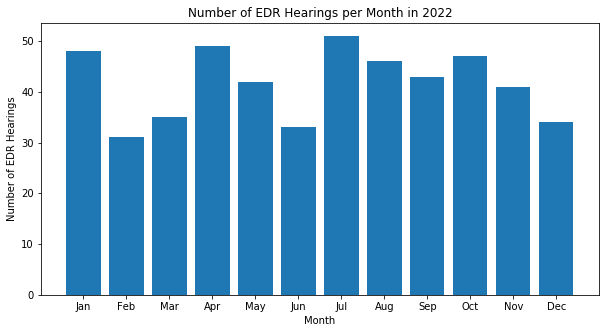

In [195]:
monthlyNumReleased = []

#Store data that will be plotted
for month in range(1, 13):
    startOfMonth = pd.to_datetime(str(2022 - 20) + "-"+ str(month) + "-01")
    endOfMonth = pd.to_datetime(str(2022 - 20) + "-"+ str(month)) + MonthEnd(0)
    numReleased = len(df.loc[(df["Custody Date"] >= startOfMonth) & (df["Custody Date"] <= endOfMonth)])
    monthlyNumReleased.append(numReleased)
    
print(sum(monthlyNumReleased))
    
# Plot data
plt.figure(figsize=(10,5))
plt.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], monthlyNumReleased)
plt.title("Number of EDR Hearings per Month in 2022")
plt.xlabel("Month")
plt.ylabel("Number of EDR Hearings")
plt.show()

A total of 500 EDR hearings will occur in 2022, assuming a grant rate of 100%. This calculation excludes inmates who served 20 years or more of their sentence prior to January 1st, 2022.

# Statistics for Number of Inmates 60, or Older to be Released in 2022

In [196]:
def calcNumInmatesOfAgeInRange(startYear, endYear, age, grantRate):
    numInmatesDenied = [0,0]
    numInmates = []
    
    for year in range(startYear, endYear + 1):
        birthdateCutoff = pd.to_datetime(str(year - age) + "-12-31")
        dfAgeAndOlder = df.loc[(df["Date of Birth"] <= birthdateCutoff)]

        twentyYearsServedDate = pd.to_datetime(str(year - 20) + "-12-31")
        numOverAgeReleased = len(dfSixtyAndOlder.loc[df["Custody Date"] <= twentyYearsServedDate])
        
        #Start accounting for inmates reapplying for parole 2 years after startYear
        if(year == startYear): #Initialize array with denied inmates for first 2 years
            numInmatesDenied[0] = numOverAgeReleased * (1 - grantRate)
            numInmates.append(numOverAgeReleased)
        elif(year == startYear + 1):
            numInmatesDenied[1] = numOverAgeReleased * (1 - grantRate)
            numInmates.append(numOverAgeReleased)
        elif(year >= startYear + 2):
            twoYearsBack = numInmatesDenied[0]
            numInmates.append(numOverAgeReleased + numInmatesDenied[0])
            numInmatesDenied[0] = numInmatesDenied[1]
            numInmatesDenied[1] = (numOverAgeReleased + twoYearsBack) * (1 - grantRate)
            
    return int(sum(numInmates) * grantRate) #Cast to int truncates

In [197]:
numOverSixty = calcNumInmatesOfAgeInRange(2022, 2022, 60, 1)

print(numOverSixty)
print(numOverSixty * costOfAnInmateOverSixty)

1252
85474040


- Number of inmates over 60 and served >= 20 years of their sentence: 1252
- Savings from releasing inmates over 60, served >= 20 years of sentence: $85,474,040

# Statistics for Number of Inmates 60, or Older to be Released in 2022-2027, and 2022-2032

In [198]:
print(calcNumInmatesOfAgeInRange(2022, 2027, 60, .197))
print(calcNumInmatesOfAgeInRange(2022, 2027, 60, .197) * costOfAnInmateOverSixty)
print(calcNumInmatesOfAgeInRange(2022, 2032, 60, .197))
print(calcNumInmatesOfAgeInRange(2022, 2032, 60, .197) * costOfAnInmateOverSixty)
print('\n')

print(calcNumInmatesOfAgeInRange(2022, 2027, 60, .356))
print(calcNumInmatesOfAgeInRange(2022, 2027, 60, .356) * costOfAnInmateOverSixty)
print(calcNumInmatesOfAgeInRange(2022, 2032, 60, .356))
print(calcNumInmatesOfAgeInRange(2022, 2032, 60, .356) * costOfAnInmateOverSixty)
print('\n')

print(calcNumInmatesOfAgeInRange(2022, 2027, 60, .465))
print(calcNumInmatesOfAgeInRange(2022, 2027, 60, .465) * costOfAnInmateOverSixty)
print(calcNumInmatesOfAgeInRange(2022, 2032, 60, .465))
print(calcNumInmatesOfAgeInRange(2022, 2032, 60, .465) * costOfAnInmateOverSixty)

2862
195388740
8131
555103370


4657
317933390
12011
819990970


5657
386203390
13802
942262540
